In [ ]:
! rm daily.csv* && wget https://covidtracking.com/api/us/daily.csv .

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
x = pd.read_csv("daily.csv")
x['date']=pd.to_datetime(x['date'],format='%Y%m%d')
x.set_index(['date'],inplace=True)

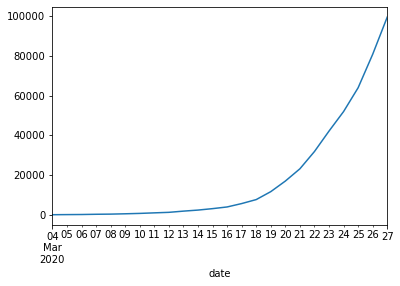

In [6]:
x['positive'].plot()

In [7]:
x.head()

,states,positive,negative,posNeg,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,
2020-03-27,56,99447,527220,626667,60094,13718.0,1530.0,686761,5eaba901381e06e821ea5e2d8806a84e3cfd1eb0,2020-03-27T20:00:00Z,626667,NaN,367.0,3587.0,88617.0,18712.0,107329.0
2020-03-26,56,80735,438603,519338,60251,10131.0,1163.0,579589,77e73bd9ca5316e76685e4fd31fd7adbd7ba4f45,2020-03-26T20:00:00Z,519338,NaN,263.0,3995.0,80999.0,16807.0,97806.0
2020-03-25,56,63928,357604,421532,51235,6136.0,900.0,472767,99e1bdff6a809d12b2e76a9e7c8a678d32a6f670,2020-03-25T20:00:00Z,421532,NaN,225.0,1668.0,64846.0,11974.0,76820.0
2020-03-24,56,51954,292758,344712,14433,4468.0,675.0,359145,eaedae24caa3d2c2dcbad823b248b729972e9960,2020-03-24T20:00:00Z,344712,NaN,204.0,1143.0,55437.0,9802.0,65239.0
2020-03-23,56,42152,237321,279473,14571,3325.0,471.0,294044,cca0aa4d7ad5221bf9e3b542fb56c03418b79874,2020-03-23T20:00:00Z,279473,NaN,73.0,771.0,43858.0,10273.0,54131.0
